In [17]:
# Ta sử dụng hàm integrate của lớp ODE trong thư viện Scipy để giải phương trình vi phân f(t,y,y') = 0. Cụ thể như sau:
# Phương trình: y' = y với y = y(t) (dễ thấy phương trình có nghiệm là y = e ^ t)
# Lưu ý 1: hàm integrate không trả về một phương trình giống như khi giải một phương trình vi phân thông thường  mà chỉ tính gần đúng giá trị của y(t) khi cho trước t = t0.
# Lưu ý 2: các con số cần được viết dưới dạng số thực (2 thì viết là 2.0)
# Demo các sử dụng hàm:

from scipy.integrate import ode #khai báo lớp ODE
import numpy as np
import matplotlib.pyplot as plt

def f(t,y): # khởi tạo phương trình vi phân f theo dạng y' = .... (trong trường hợp này là y' = y)
    return y # y' = y

y0 = np.array([1.0]) # khởi tạo giá trị ban đầu cho y (mặc định là xét t = 0.0)

ode_f = ode(f) # khởi tại đối tượng ode với f
ode_f.set_integrator('vode') # khai báo thuật toán được sử dụng
# nếu là vode thì sẽ sử dụng phương pháp adam để tính toán
ode_f.set_initial_value(y0,1.0) # gán giá trị khởi tạo

print(ode_f.successful())# kiểm tra hàm chạy ok chưa

True


In [13]:
t1 = 3 # tính y với t = 3
y1 = ode_f.integrate(t1) # Lưu ý: kết quả luôn trả về dang np.array
y1

array([7.38906009])

In [18]:
t = np.linspace(2.0,5.0,100)
y = np.zeros(len(t))
for i in range(len(t)):
    y[i] = (ode_f.integrate(t[i]))[0]
    assert ode_f.successful()

print(t)
print(y)

[2.         2.03030303 2.06060606 2.09090909 2.12121212 2.15151515
 2.18181818 2.21212121 2.24242424 2.27272727 2.3030303  2.33333333
 2.36363636 2.39393939 2.42424242 2.45454545 2.48484848 2.51515152
 2.54545455 2.57575758 2.60606061 2.63636364 2.66666667 2.6969697
 2.72727273 2.75757576 2.78787879 2.81818182 2.84848485 2.87878788
 2.90909091 2.93939394 2.96969697 3.         3.03030303 3.06060606
 3.09090909 3.12121212 3.15151515 3.18181818 3.21212121 3.24242424
 3.27272727 3.3030303  3.33333333 3.36363636 3.39393939 3.42424242
 3.45454545 3.48484848 3.51515152 3.54545455 3.57575758 3.60606061
 3.63636364 3.66666667 3.6969697  3.72727273 3.75757576 3.78787879
 3.81818182 3.84848485 3.87878788 3.90909091 3.93939394 3.96969697
 4.         4.03030303 4.06060606 4.09090909 4.12121212 4.15151515
 4.18181818 4.21212121 4.24242424 4.27272727 4.3030303  4.33333333
 4.36363636 4.39393939 4.42424242 4.45454545 4.48484848 4.51515152
 4.54545455 4.57575758 4.60606061 4.63636364 4.66666667 4.69696

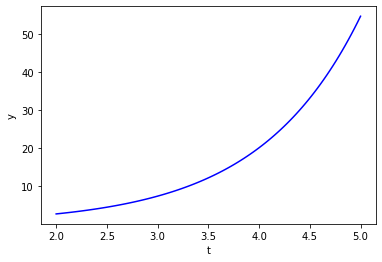

In [19]:
# biểu diễn trên đồ thị
plt.plot(t, y, 'b-')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

# đúng là hàm y = e ^ t